In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("Book1.csv")
df

,Industry,Sales,R&D,Profits
0,Food,"3,74,342","2,716","2,34,662"
1,"Textiles,apparel,and leather","51,639",816,"53,510"
2,Basic chemicals,"1,09,899","2,277","75,168"
3,"Resin, synthetic rubber, ?bers, and ?lament","1,32,934","2,294","34,645"
4,Pharmaceuticals and medicines,"2,73,377","34,839","1,27,639"
5,Plastics and rubber products,"90,176","1,760","96,162"
6,Fabricated metal products,"1,74,165","1,375","1,55,801"
7,Machinery,"2,30,941","8,531","1,43,472"
8,Computers and peripheral equipment,"91,010","4,955","34,004"
9,Semiconductor and other electronic components,"1,76,054","18,724","81,317"


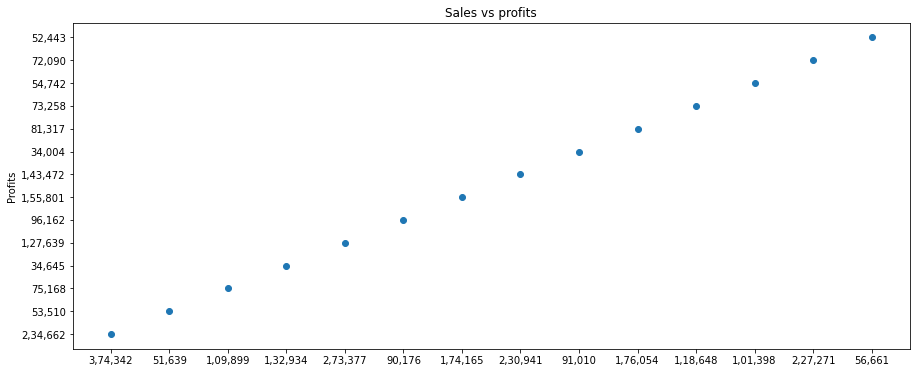

In [6]:
fig=plt.figure()
plt.title('Sales vs profits')
plt.scatter(df.Sales,df.Profits)
plt.ylabel('Profits')
plt.tight_layout
fig.set_figheight(6)
fig.set_figwidth(15)
plt.show()

In [7]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [16]:
y = df["Profits"].tolist()
x = df["Sales"].tolist()
df_model = sm.OLS(y,x).fit()

TypeError: cannot perform reduce with flexible type

In [15]:
df_model.summary()

NameError: name 'df_model' is not defined

In [ ]:
def test_model(col):
    s = []

    for i in col:
        a = [1,i]
        s.append(a)
    return (np.array(s))

prof_model = test_model(df["Profits"])
prof_model

In [ ]:
#H0 : Homoscdasticity is present The residual are didtributed with equal variance
#HA : Hetroscdasticity is present The residual are not distributed with equal variance

from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(df_model.resid,prof_model)
print("LM Test P_value")
print(bp_test[1])

In [ ]:
#Removing hetro
#Log Transfrom
df['log_profits'] = np.log(df['Profits'])
f = 'log_profits~Sales'
df_model = ols(formula= f, data=df).fit()
#Using   same 2d reshaping function as   previous step
log_NOX_model = test_model(df['log_profits'])
bp_test = het_breuschpagan(df_model.resid, log_NOX_model)
print(bp_test[1])

In [ ]:
#Box Cox Transform
from scipy import stats
x,_=stats.boxcox(df['Profits'])
df['trans_Profits'] = x
f= 'trans_Profits~Sales'
df_model = ols(formula=f, data= df).fit()
#using the same 2d reshaping func as the prev step
trans_profits_model = test_model(df['trans_Profits'])
bp_test = het_breuschpagan(df_model.resid,trans_profits_model)
print('LM-test p value')
print(bp_test[1])